<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade3/atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Média Móvel

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from matplotlib import patches, rcParams, figure
from scipy.io import wavfile
from scipy.signal import chirp

###A. 
- No Python (Numpy/Scipy), implemente com a função `scipy.signal.lfilter` um sistema média móvel de duas amostras. Considere a entrada `x=[10,3,−3,3,8,1,−2]`.
___

In [147]:
x = [10, 3, -3, 3, 8, 1, -2]
input = np.array(x)
a = [1]
b = [0.5, 0.2]

Valores da média móvel: [ 5.   3.5 -0.9  0.9  4.6  2.1 -0.8]


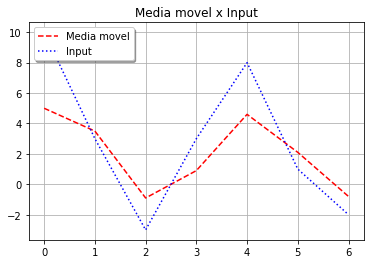

In [148]:
#lfilter: filter data along one-dimension with an IIR or FIR filter
media_movel = signal.lfilter(b, a, input)
print(f"Valores da média móvel: {media_movel}")
fig, ax = plt.subplots()
ax.plot(media_movel, "r--", label = "Media movel")
ax.plot(input, "b:", label = "Input")
legend = ax.legend(loc='upper left', shadow=True, fontsize='medium')
plt.grid()
plt.title('Media movel x Input')
plt.show()


###B. 
- Verifique se a saída está correta (faça o cálculo manualmente). Foi por esse motivo que usamos um sinal  x(n)  simples, para calcular a saída manualmente e ter certeza que a implementação está correta.
___

Equção implementada pelo lfilter: `b[0]*x[n] + b[1]*x[n-1]`
- y(0) = b(0)*x(0)+b(1)*x(-1) = 0.5*10+0.2*0 = 5
- y(1) = b(0)*x(1)+b(1)*x(1-1) = 0.5*3+0.2*10 = 3.5
- y(2) = b(0)*x(2)+b(1)*x(2-1) = 0.5*(-3)+0.2*3 = -0.9
- y(3) = b(0)*x(3)+b(1)*x(3-1) = 0.5*3+0.2*(-3) = 0.9
- y(4) = b(0)*x(4)+b(1)*x(4-1) = 0.5*8+0.2*3 = 4.6
- y(5) = b(0)*x(5)+b(1)*x(5-1) = 0.5*1+0.2*8 = 2.1
- y(6) = b(0)*x(6)+b(1)*x(6-1) = 0.5*(-2)+0.2*1 = -0.8

###C. 
- Verifique com a função `scipy.signal.freqz` a resposta em frequência do sistema. Que tipo de filtro é o sistema média móvel? Qual a sua frequência de corte, em Hz, considerando uma frequência de amostragem de 44100 Hz?

- Confira se o resultado está correto fazendo também de forma analítica. Anexe uma foto com seu cálculo. Para isso, lembre que a frequência de corte de um filtro é aquela em que a magnitude de  `H(z)`  é  1/√2 . Você já tem a resposta em frequência (olhe no vídeo). Obtenha a magnitude, depois iguale a 1/√2  e isole a frequência.
___

Cálculo da frequência:

- Parâmetros:

  $H(z) = \frac{1}{\sqrt2}$

  $\Omega = \frac{2\pi f}{fs}$

  $fs=44100Hz$

- Desenvolvimento:

  $\mathrm{e}^{f \Omega}=cos.y(\Omega)+f(sin(\Omega))$

   $H(z)=0.5(z+1)$

  $H(z)=0.5z+0.5$

  $H(\mathrm{e}^{f \Omega}) = 0.5(cos(\Omega)+f(sin(\Omega)))+0.5$

  $H(\mathrm{e}^{f \Omega})=\sqrt(0.5(1+cos(\Omega)))=\frac{1}{\sqrt(2)}$

  $\frac{1}{2}=0.5(1+cos(\Omega))$

  $1=1+cos(\Omega)$
  
  $cos(\Omega)=0$
  
  $\Omega=\frac{\pi}{2}$

  $f=\frac{fs}{4}=\frac{44100}{4}=11025Hz$




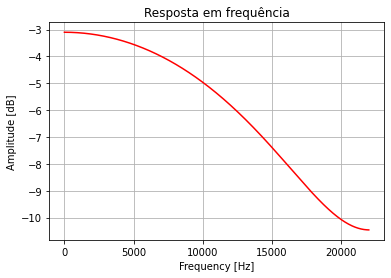

In [157]:
a = [1]
b = [0.5, 0.2]
f2w = 2*np.pi
#freqz: Compute the frequency response of a digital filter.
fs,h = signal.freqz(b, a, fs=f2w*44100)
plt.plot(fs/(f2w), 20*np.log10(abs(h)), "r")
plt.grid()
plt.title('Resposta em frequência')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.show() 

#fazer -3db do valor de pico (8db)


###D.
- Um tom senoidal puro de 17 kHz, amplitude de pico de 1,5 V, amostrado a 44,1 kHz, é aplicado à entrada do sistema média móvel de 2 amostras. Qual o sinal de saída (tipo, frequência e amplitude)? Mostre.
___

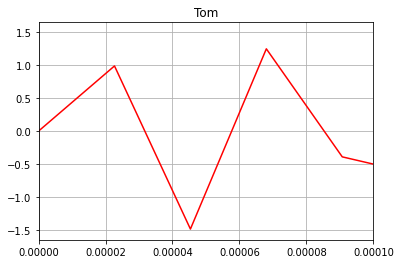

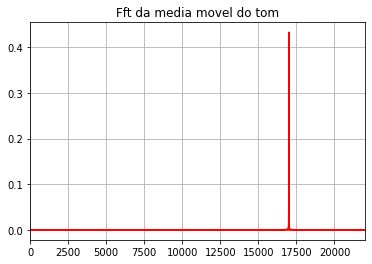

In [150]:
f = 17000
fs = 44100
amplitude = 1.5
k = np.linspace(0,1, fs)
tom = amplitude*(np.sin(f2w*17000*k))
plt.xlim(0,0.0001)
plt.plot(k,tom,"r")
plt.title('Tom')
plt.grid()
plt.show()

media_movel_tom = signal.lfilter(b,a,tom)

fft_media_movel_tom = np.fft.fft(media_movel_tom)
n = fft_media_movel_tom.size
freq = np.fft.fftfreq(n, 1/fs)
plt.xlim(0,22000)
plt.plot(freq,abs(fft_media_movel_tom)*2/fs, "r")
plt.title('Fft da media movel do tom')
plt.grid()
plt.show()


###E. 
- Com zplane (baixar de https://www.dsprelated.com/showcode/244.php), onde estão localizadas as singularidades (polos e zeros) no domínio Z do sistema média móvel de 2 amostras?
___


polos:[], zeros:[-0.4], k:1.0


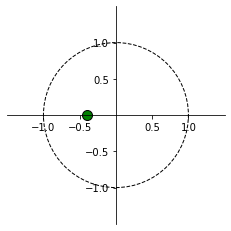

In [151]:
a = [1]
b = [0.5, 0.2]

def zplane(b,a,filename=None):
    ax = plt.subplot(111)

    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)

    if np.max(b) > 1:
        kn = np.max(b)
        b = b/kn
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    print(f"polos:{p}, zeros:{z}, k:{k}") 

    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0, markeredgecolor='k', markerfacecolor='g')

    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0, markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; 
    plt.xticks(ticks); 
    plt.yticks(ticks)

    plt.show()


zplane(b,a)

###F. 
-Ainda no Python, implemente uma média móvel com quatro amostras. Há um efeito de suavização na saída?
___

SIm, há um grande efeito de suavização quando há mais amostras.

input: [10  3 -3  3  8  1 -2]
a: [1]
b: [0.5, 0.2]
valor da media movel de duas entradas =  [ 5.   3.5 -0.9  0.9  4.6  2.1 -0.8]
valor da media movel de quatro entradas =  [2.5  3.25 2.5  3.25 2.75 2.25 2.5 ]


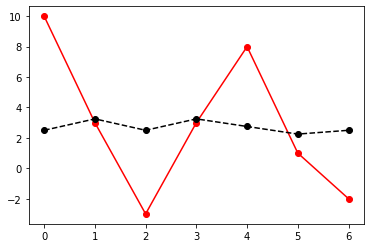

In [152]:
print(f'input: {input}')
print(f'a: {a}')
print(f'b: {b}')

b4 = [0.25,0.25,0.25,0.25]
media_movel_quatro = signal.lfilter(b4,a,input)

print('valor da media movel de duas entradas = ', media_movel)
print('valor da media movel de quatro entradas = ', media_movel_quatro)

plt.plot(input,'r',input,'or',media_movel_quatro,'--k',media_movel_quatro,'ok')
plt.show()

###G. 
- Verifique a resposta em frequência do sistema com freqz. Qual a diferença em relação ao sistema de 2 amostras?
___

Há diferença em algumas frequências, onde na média movel de 4 amostras há uma diminuição na amplitude.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


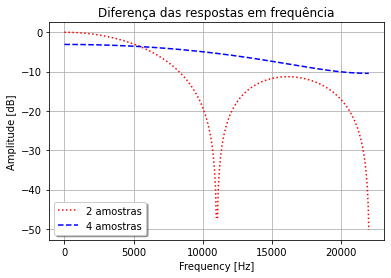

In [158]:
f2w=2*np.pi
fs,h = signal.freqz(b, fs=f2w*44100)
 
f4w = 2*np.pi
fs4,h4 = signal.freqz(b4, fs=f4w*44100)

fig, ax = plt.subplots()

ax.plot(fs4/(f2w), 20*np.log10(abs(h4)), "r:", label = "2 amostras")
ax.plot(fs/(f2w), 20*np.log10(abs(h)), "b--", label= "4 amostras")
legend = ax.legend(loc='lower left', shadow=True, fontsize='medium')
plt.grid()
plt.title('Diferença das respostas em frequência')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.show()

###H. 
- Gere um sinal sweep no Ocenaudio (ou gere diretamente no Python) e grave em formato wav. Leia o arquivo no Python e use como entrada da média móvel com 4 amostras. Grave a saída, abra no Ocenaudio e observe a saída no tempo e no domínio da frequência. O resultado é condizente com o esperado no item G? Mostre.
___

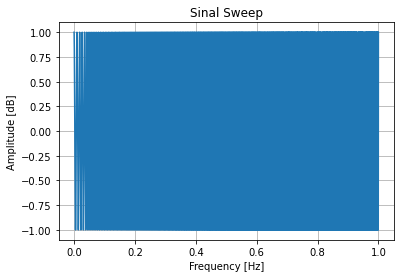

In [154]:
fs = 44100
t = np.linspace(0,1,fs)
sweep = chirp(t,100,1,1000) #gerando o sweep

plt.plot(t,sweep)
plt.grid()
plt.title('Sinal Sweep')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.show()

wavfile.write("sweep.wav",fs , sweep) #gravando o arquivo sweep

filtered=signal.lfilter(b4,a,sweep) #usando sweep como input da media movel de 4 amostras

wavfile.write("sweepfilter.wav",fs , filtered) #gravando o arquivo sweep
